In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from scipy.special import softmax

2024-10-04 18:21:55.124548: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 18:21:55.269604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 18:21:55.311625: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 18:21:55.521355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 18:21:58.742665: W tensorflow/compiler/tf2

In [2]:
raw_data = ""
with open('data.txt') as f:
  raw_data = f.read()

In [3]:
raw_data = raw_data.split('\n')

In [14]:
corpus = []
for s in raw_data:
  s = s.strip()
  s = s.replace(' می ', ' می')
  s = s.replace(' ام ', 'ام ')
  s = s.replace(' اش ', 'اش ')
  s = s.replace(' ای ', 'ای ')
  s = s.replace(' تر ', 'تر ')
  s = s.replace(' ها ', 'ها ')
  corpus.append(s)
print(corpus[:10])

['کنار مشتی خاک', 'در دوردست خودم تنها نشستهام', 'نوسان خاکها شد', 'و خاکها از میان انشگتانم لغزید و فرو ریخت', 'شبیه هیچ شدهای', 'چهره ات را به سردی', 'خاک بسپار', 'اوج خودم را گم کردهام', 'میترسم', 'از لحظه بعد و از این پنجرهای که به روی احساسم گشوده شود']


In [5]:
tokenizer = Tokenizer(oov_token='<OOV>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
tokenizer.fit_on_texts(corpus)
vocab = tokenizer.word_index

In [6]:
len(vocab)

3428

In [13]:
input_seqs = []
for line in corpus:
  seq = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(seq)):
    n_gram = seq[:i + 1]
    input_seqs.append(n_gram)
max_len = max([len(x) for x in input_seqs])
padded = pad_sequences(input_seqs, maxlen=max_len, padding='pre')

In [8]:
xs, labels = padded[:, :-1], padded[:, -1]

In [9]:
ys = tf.keras.utils.to_categorical(labels, num_classes=len(vocab))

In [10]:
xs.shape

(11673, 16)

In [11]:
ys.shape

(11673, 3428)

In [ ]:
model = Sequential()
model.add(Embedding(len(vocab), 128))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.01))
model.add(Dense(len(vocab), activation='softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['cosine_similarity', 'accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("sohrab.keras", monitor="loss", save_best_only=True)

In [ ]:
hist = model.fit(xs, ys, callbacks=[checkpoint], epochs=150)

Epoch 1/150


2024-10-03 18:44:43.831650: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


365/365 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.0268 - cosine_similarity: 0.0589 - loss: 7.5715
Epoch 2/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0301 - cosine_similarity: 0.0722 - loss: 6.8080
Epoch 3/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0362 - cosine_similarity: 0.0761 - loss: 6.6770
Epoch 4/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0388 - cosine_similarity: 0.0824 - loss: 6.4687
Epoch 5/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0384 - cosine_similarity: 0.0842 - loss: 6.3486
Epoch 6/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0474 - cosine_similarity: 0.0902 - loss: 6.2001
Epoch 7/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0557 - cosine_similarity: 0.1014 - loss: 5.9524
Epoch 8/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0598 - cosine_similarity: 0.1087 - loss: 5.7595
Epoch 9/150
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0702 - cosine_s

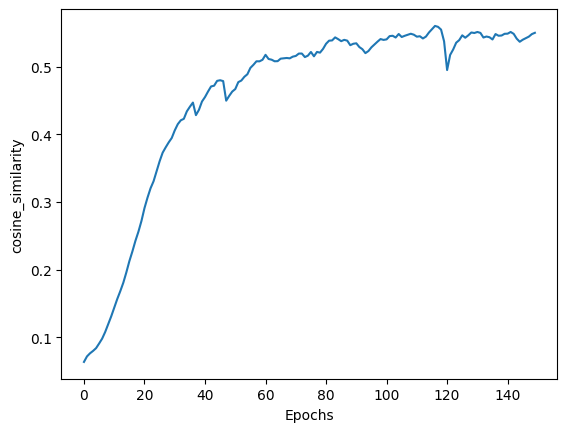

In [ ]:
plt.plot(hist.history['cosine_similarity'])
plt.xlabel('Epochs')
plt.ylabel('cosine_similarity')
plt.show()

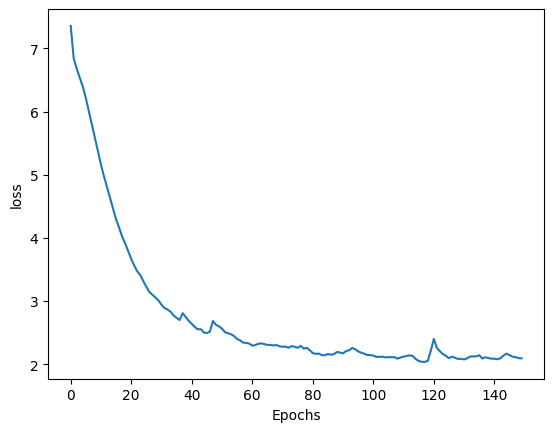

In [ ]:
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [7]:
#model.load_weights('sohrab.weights.h5')
loaded_model = tf.keras.models.load_model('sohrab.keras')

I0000 00:00:1728053531.646093    3168 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728053531.884319    3168 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728053531.884718    3168 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728053531.887273    3168 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [32]:
SEQ_LEN = 10
K = 10
DECODING_METHODS = { "greedy": 0, "sampling": 1, "top_k": 2 }
sentence = "در فرودست انگار"
decoding_method = DECODING_METHODS['top_k']
for i in range(SEQ_LEN):
  s = tokenizer.texts_to_sequences([sentence])
  s = pad_sequences(s, maxlen=max_len)
  p = loaded_model.predict(s, verbose=0)
  if decoding_method == DECODING_METHODS['greedy']:
    idx = np.argmax(p[0])
  elif decoding_method == DECODING_METHODS['sampling']:
    idx = np.random.choice(range(1, len(vocab)+1), 1, p=p[0])
  elif decoding_method == DECODING_METHODS['top_k']:
    v = list(zip(range(1, len(vocab)+1), p[0]))
    v = np.array(sorted(v, key=lambda i: i[1], reverse=True)[:K])
    idx = np.random.choice(v[:,0], 1, p=softmax(v[:,1]))
  sentence +=  " " + [w for w in vocab if vocab[w]==idx][0]
print(sentence)

در فرودست انگار است هیچ تمام سکوت کودک تو روی پوستها کرد آید
